In [102]:
!pip install ydata-profiling

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.1 MB 2.8 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/3.1 MB 2.8 MB/s eta 0:00:01
   -------------------- ------------------- 1.6/3.1 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 2.4/3.1 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 3.1/3.1 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: multimethod
    Found existing installation: multimethod 2.0
    Uninstalling multimethod-2.0:
      Successfully uninstalled multimethod-2.0
  Attempting uninstall: imagehash
    Found existing installation: ImageHash 4.3.2
    Uninstalling ImageHash-4.3.2:
      Successfully uninstalled ImageHash-4.3.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled v

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [112]:
# ------------------------------------------------------------
# Customer Purchase Behavior Prediction
# Target Column: loyalty_status
# Models: Logistic Regression, Random Forest, XGBoost
# ------------------------------------------------------------

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
%matplotlib inline


In [115]:
# ------------------------------------------------------------
# Step 2: Load the Dataset
# ------------------------------------------------------------
df = pd.read_csv("customer_data.csv")   # change filename if needed
print("Dataset loaded successfully ✅")
df.head()



Dataset loaded successfully ✅


id  age  gender  income   education region loyalty_status  \
0   1   27    Male   40682    Bachelor   East           Gold   
1   2   29    Male   15317     Masters   West        Regular   
2   3   37    Male   38849    Bachelor   West         Silver   
3   4   30    Male   11568  HighSchool  South        Regular   
4   5   31  Female   46952     College  North        Regular   

  purchase_frequency  purchase_amount product_category  promotion_usage  \
0           frequent            18249            Books                0   
1               rare             4557         Clothing                1   
2               rare            11822         Clothing                0   
3           frequent             4098             Food                0   
4         occasional            19685         Clothing                1   

   satisfaction_score  
0                   6  
1                   6  
2                   6  
3                   7  
4                   5

In [116]:
# ------------------------------------------------------------
# Step 3: Basic Data Info
# ------------------------------------------------------------
print(df.info())
print(df.describe())
print(df.isnull().sum())
df = df.drop(columns=['id'])
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB
None
                  id            age         income  purchase_amount  \
count  100000.000000  100000.000000  100000.000000    100000.000000   
mean   

age  gender  income   education region loyalty_status purchase_frequency  \
0   27    Male   40682    Bachelor   East           Gold           frequent   
1   29    Male   15317     Masters   West        Regular               rare   
2   37    Male   38849    Bachelor   West         Silver               rare   
3   30    Male   11568  HighSchool  South        Regular           frequent   
4   31  Female   46952     College  North        Regular         occasional   

   purchase_amount product_category  promotion_usage  satisfaction_score  
0            18249            Books                0                   6  
1             4557         Clothing                1                   6  
2            11822         Clothing                0                   6  
3             4098             Food                0                   7  
4            19685         Clothing                1                   5

In [117]:
# ------------------------------------------------------------
# Step 4: Handle Missing Values (if any)
# ------------------------------------------------------------
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)  # for categorical

print("hv")

hv


In [119]:
from ydata_profiling import ProfileReport

In [120]:
report = ProfileReport(df, title="Customer Report")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 15.83it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Exploratory Data Analysis (EDA) Visualizations

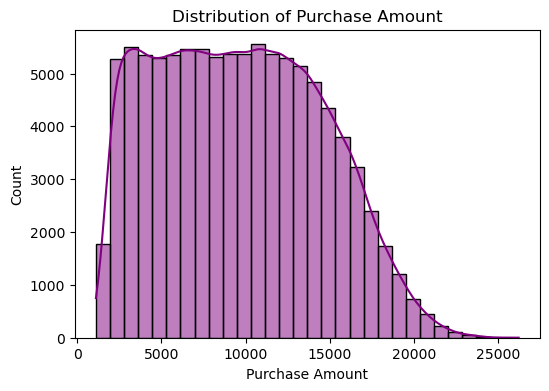

In [121]:
plt.figure(figsize=(6,4))
sns.histplot(df['purchase_amount'], bins=30, kde=True, color='purple')
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Count")
plt.show()


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  int64 
 1   gender              100000 non-null  object
 2   income              100000 non-null  int64 
 3   education           100000 non-null  object
 4   region              100000 non-null  object
 5   loyalty_status      100000 non-null  object
 6   purchase_frequency  100000 non-null  object
 7   purchase_amount     100000 non-null  int64 
 8   product_category    100000 non-null  object
 9   promotion_usage     100000 non-null  int64 
 10  satisfaction_score  100000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 8.4+ MB


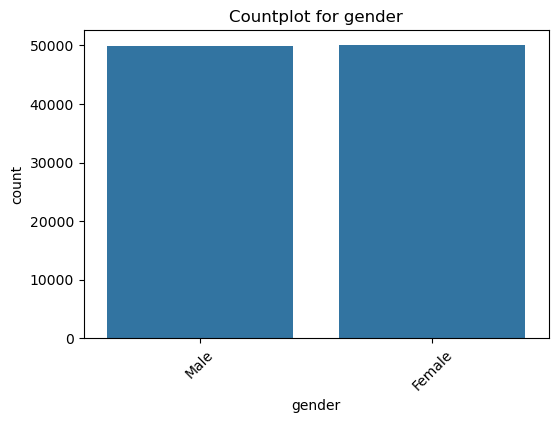

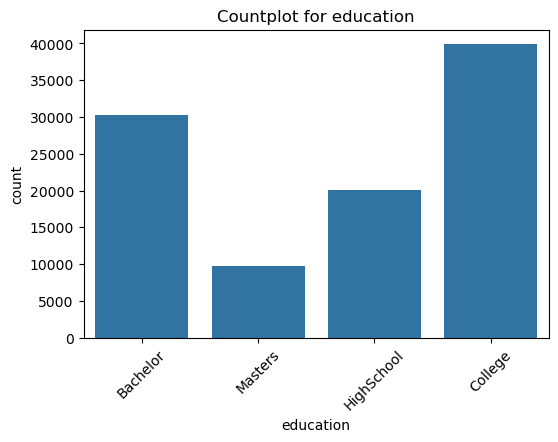

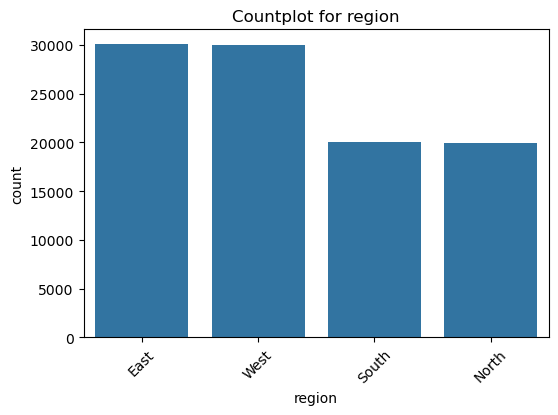

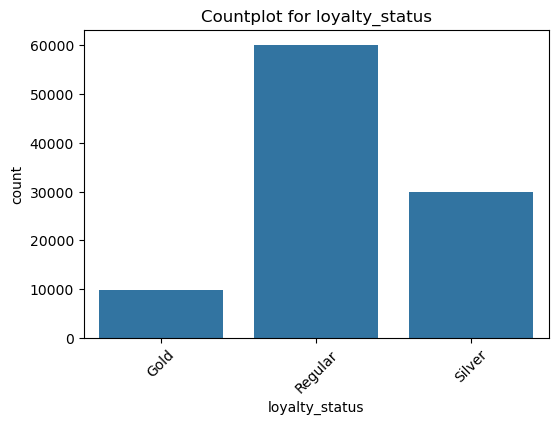

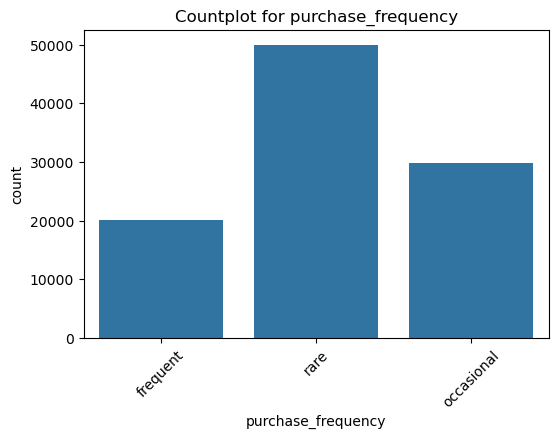

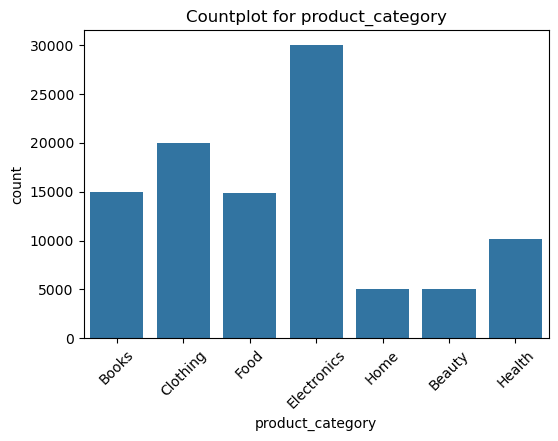

In [124]:
categorical_cols = df.select_dtypes(include=['object']).columns  # include int if encoded

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col].astype(str))  # convert to string
    plt.title(f"Countplot for {col}")
    plt.xticks(rotation=45)
    plt.show()


### Feature Analysis & Relationships

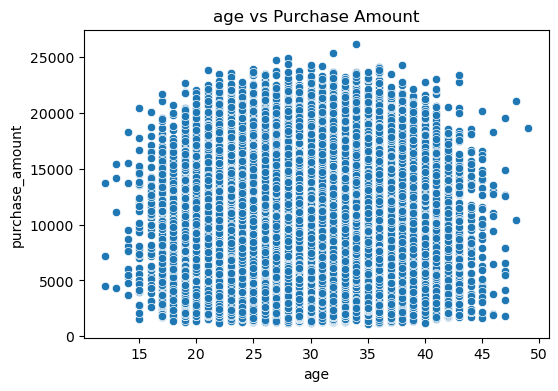

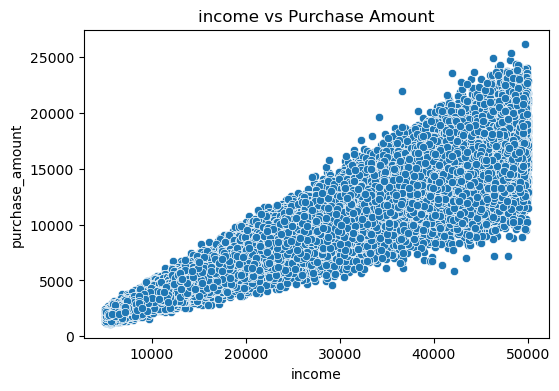

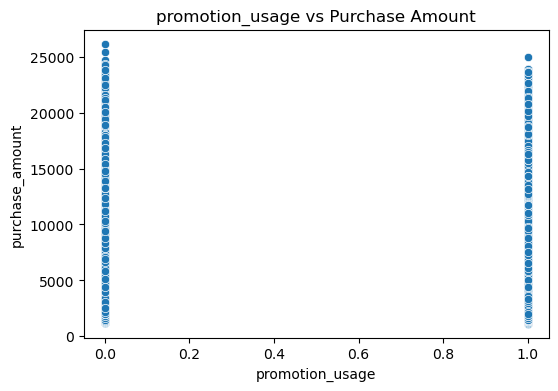

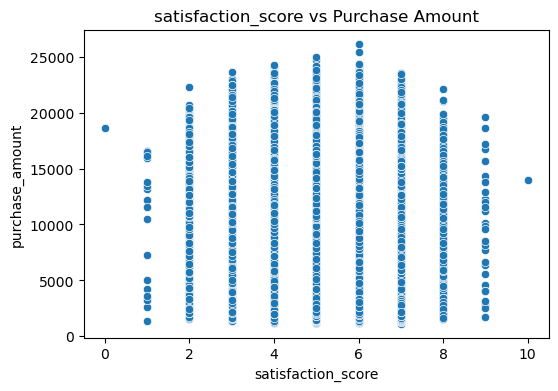

In [129]:
numeric_cols = df.select_dtypes(include='int').columns.drop('purchase_amount')
for col in numeric_cols[:5]:  # visualize first 5 features for brevity
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['purchase_amount'])
    plt.title(f"{col} vs Purchase Amount")
    plt.show()
    

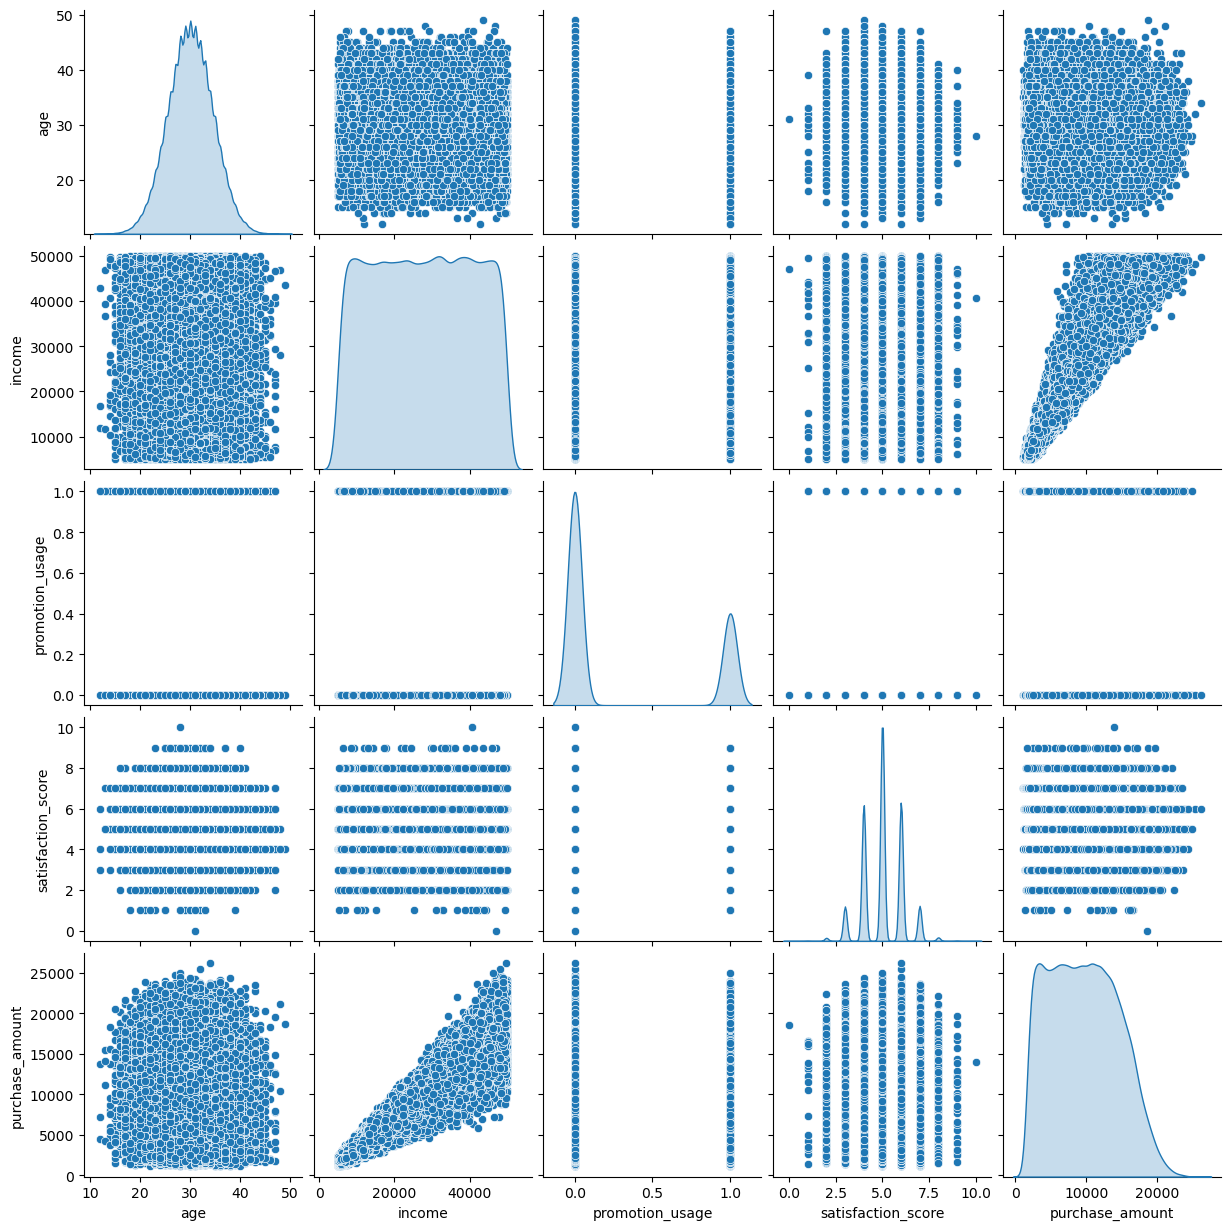

In [128]:
sns.pairplot(df[numeric_cols[:5].tolist() + ['purchase_amount']], diag_kind='kde')
plt.show()

In [130]:
# ------------------------------------------------------------
# Step 5: Encode Categorical Variables
# ------------------------------------------------------------
# Label Encoding for target column and categorical features

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# ------------------------------------------------------------
# Step 6: Define Features (X) and Target (y)
# ------------------------------------------------------------
X = df.drop('purchase_amount', axis=1)
y = df['purchase_amount']

from sklearn.preprocessing import LabelEncoder

# Encode target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print("efg")

efg


In [131]:
# ------------------------------------------------------------
# Step 6: Define Features (X) and Target (y)
# ------------------------------------------------------------
X = df.drop('purchase_amount', axis=1)
y = df['purchase_amount']

print("hv")

hv


In [132]:
from sklearn.preprocessing import LabelEncoder

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("efg")

efg


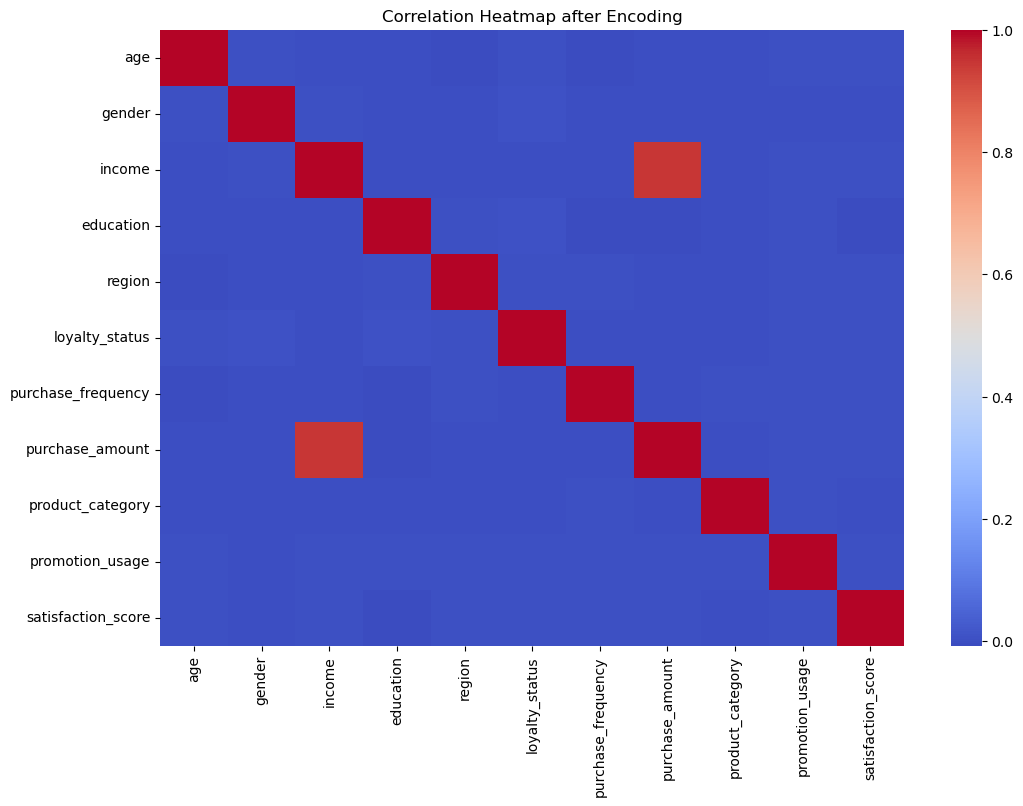

In [133]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.get_dummies(df).corr(), cmap='coolwarm')
plt.title("Correlation Heatmap after Encoding")
plt.show()


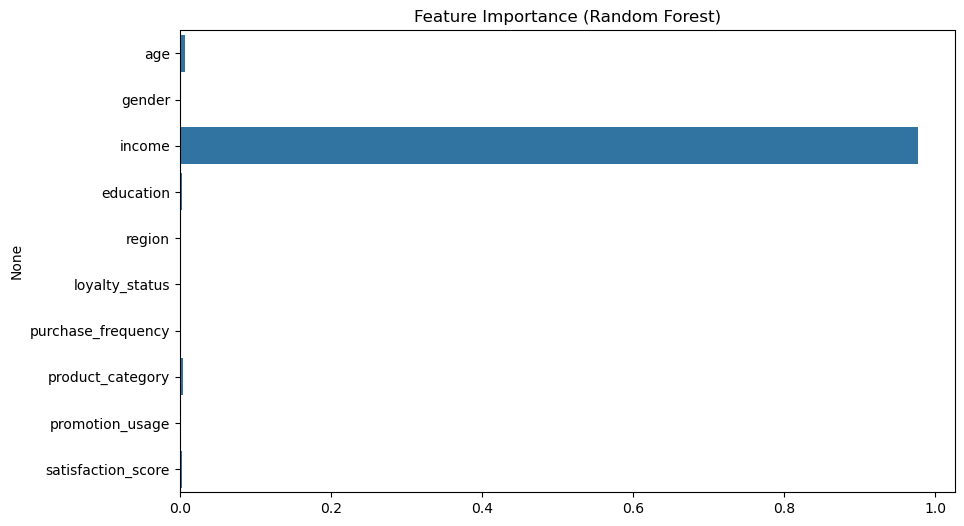

In [134]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [135]:
# ------------------------------------------------------------
# Step 7: Split Dataset
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2,random_state=42)

print("hv")


hv


In [136]:
# ------------------------------------------------------------
# Step 8: Feature Scaling
# ------------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("hv")

hv


In [137]:
# ------------------------------------------------------------
# Step 9: Build and Evaluate Models
# ------------------------------------------------------------

# ---- Logistic Regression ----

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))


rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

# ---- XGBoost Regressor ----
xgb = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=50,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))


print("done")

Linear Regression R2 Score: 0.9030147661139851
Random Forest R2 Score: 0.9023649567957001
XGBoost R2 Score: 0.9028177857398987
done


In [138]:
# ------------------------------------------------------------
# Step 10: Evaluate Performance (Regression)
# ------------------------------------------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("\nModel Performance Comparison:")

# ---- Linear Regression ----
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression → R²: {r2_lr:.4f},\n RMSE: {rmse_lr:.4f},\n MAE: {mae_lr:.4f}")

# ---- Random Forest Regressor ----
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor → R²: {r2_rf:.4f}, RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}")

# ---- XGBoost Regressor ----
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor → R²: {r2_xgb:.4f}, RMSE: {rmse_xgb:.4f}, MAE: {mae_xgb:.4f}")



Model Performance Comparison:
Linear Regression → R²: 0.9030,
 RMSE: 1473.7692,
 MAE: 1080.5503
Random Forest Regressor → R²: 0.9024, RMSE: 1478.6982, MAE: 1083.8047
XGBoost Regressor → R²: 0.9028, RMSE: 1475.2651, MAE: 1082.1175


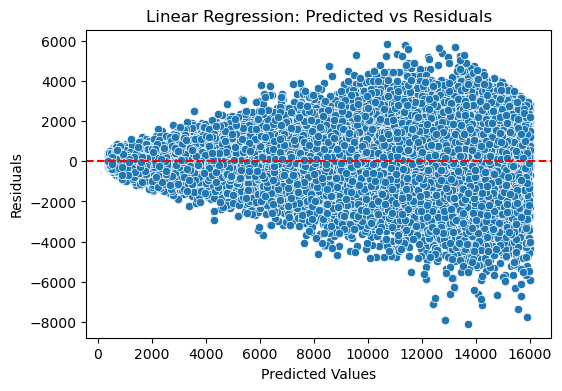

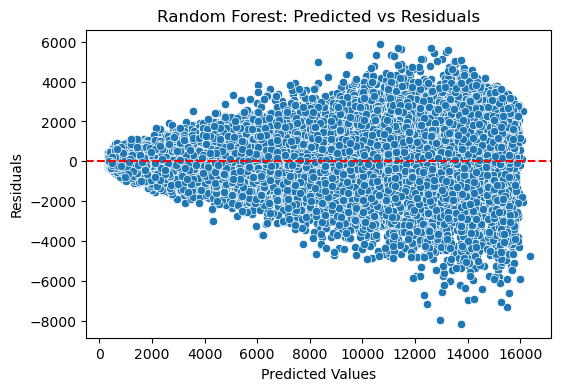

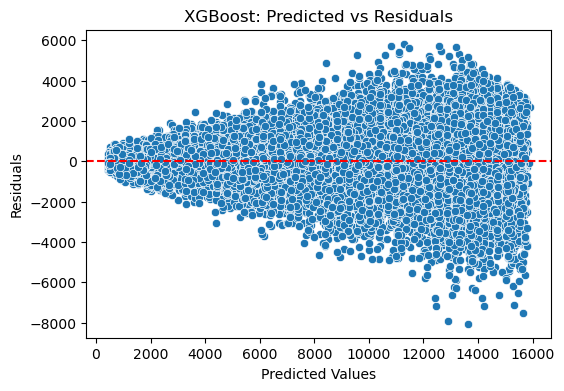

In [139]:
for pred, name in zip([y_pred_lr, y_pred_rf, y_pred_xgb], models):
    plt.figure(figsize=(6,4))
    residuals = y_test - pred
    sns.scatterplot(x=pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"{name}: Predicted vs Residuals")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()


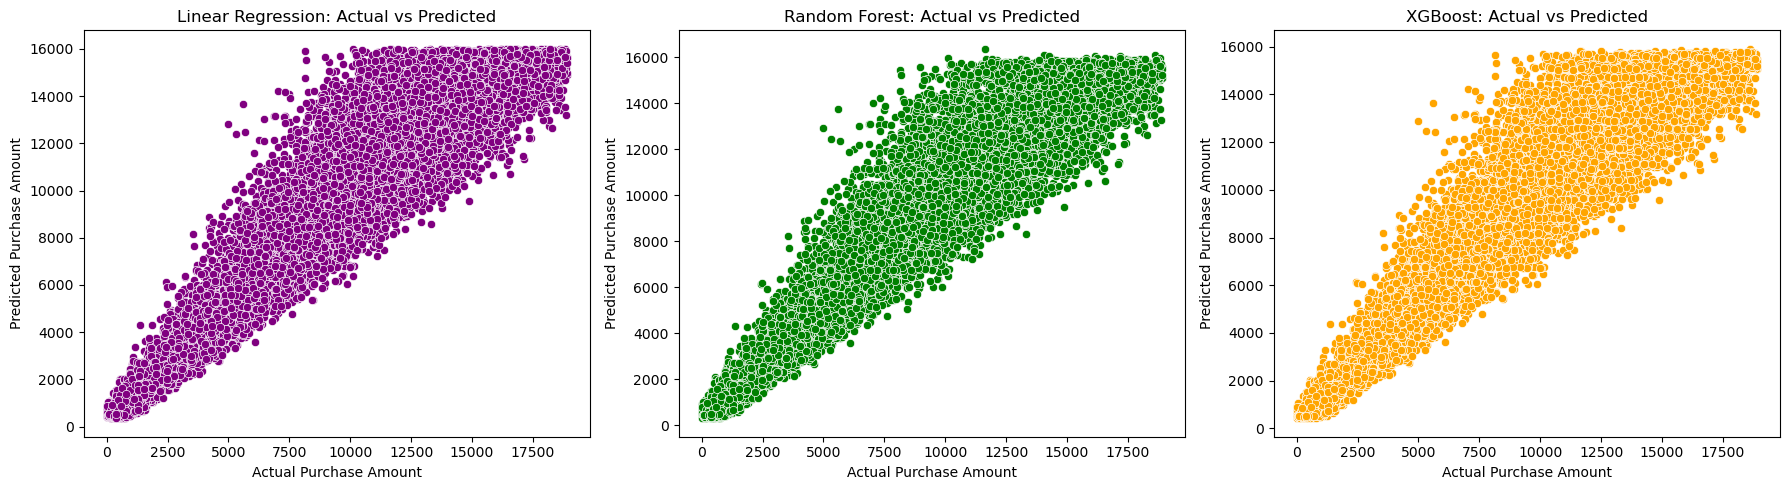

In [140]:
# ------------------------------------------------------------
# Step 11: Regression Performance Visualization
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ---- Linear Regression ----
sns.scatterplot(x=y_test, y=y_pred_lr, ax=axes[0], color='purple')
axes[0].set_title("Linear Regression: Actual vs Predicted")
axes[0].set_xlabel("Actual Purchase Amount")
axes[0].set_ylabel("Predicted Purchase Amount")

# ---- Random Forest ----
sns.scatterplot(x=y_test, y=y_pred_rf, ax=axes[1], color='green')
axes[1].set_title("Random Forest: Actual vs Predicted")
axes[1].set_xlabel("Actual Purchase Amount")
axes[1].set_ylabel("Predicted Purchase Amount")

# ---- XGBoost ----
sns.scatterplot(x=y_test, y=y_pred_xgb, ax=axes[2], color='orange')
axes[2].set_title("XGBoost: Actual vs Predicted")
axes[2].set_xlabel("Actual Purchase Amount")
axes[2].set_ylabel("Predicted Purchase Amount")

plt.tight_layout()
plt.show()



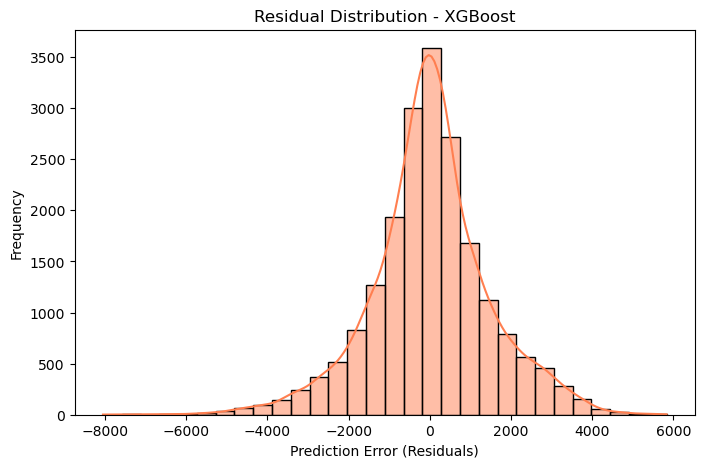

In [141]:
# Residuals = difference between actual and predicted
residuals = y_test - y_pred_xgb

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='coral')
plt.title("Residual Distribution - XGBoost")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.show()


In [101]:
# ------------------------------------------------------------
# Step 12: Conclusion
# ------------------------------------------------------------

# Compare based on R² score (the higher, the better)
best_model = max(
    [
        ('Linear Regression', r2_lr),
        ('Random Forest Regressor', r2_rf),
        ('XGBoost Regressor', r2_xgb)
    ],
    key=lambda x: x[1]
)

print(f"\n🏆 Best Performing Model: {best_model[0]} with R² score of {best_model[1]:.4f}")

print("\nSummary of Model Performance:")
print(f"Linear Regression → R²: {r2_lr:.4f}")
print(f"Random Forest Regressor → R²: {r2_rf:.4f}")
print(f"XGBoost Regressor → R²: {r2_xgb:.4f}")

print(f"\n✅ Among all tested models, {best_model[0]} achieved the highest predictive performance on customer purchase amount.")



🏆 Best Performing Model: XGBoost Regressor with R² score of 0.9131

Summary of Model Performance:
Linear Regression → R²: 0.9129
Random Forest Regressor → R²: 0.9117
XGBoost Regressor → R²: 0.9131

✅ Among all tested models, XGBoost Regressor achieved the highest predictive performance on customer purchase amount.


### DEPLOYMENT 

In [143]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb, 'xgb_purchase_model.pkl')



['xgb_purchase_model.pkl']

In [144]:
# Save any encoders/scalers if needed
joblib.dump(le, 'label_encoder.pkl') 

['label_encoder.pkl']

In [145]:
import streamlit as st
import pandas as pd
import joblib

model = joblib.load('xgb_purchase_model.pkl')

st.title("Customer Purchase Prediction")

feature1 = st.number_input("Feature 1")
feature2 = st.number_input("Feature 2")
feature3 = st.selectbox("Feature 3", ["A", "B", "C"])

if st.button("Predict"):
    df_input = pd.DataFrame([[feature1, feature2, feature3]], columns=["feature1","feature2","feature3"])
    prediction = model.predict(df_input)
    st.success(f"Predicted Purchase Amount: {prediction[0]}")


2025-10-25 22:18:38.596 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-25 22:18:38.599 Session state does not function when running a script without `streamlit run`
